In [18]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

%matplotlib inline

Differential equation governing RC circuit
---

$$ \frac{dq}{dt} = -\frac{q}{RC} + \frac{V}{R} $$

In [19]:
def dq_dt(q, t, params):
    R, C, V = params
    return (-q/(R*C) + V/R)

Parameters for circuit
---

In [30]:
R = 5
C = 5
V = 5
Q0 = 0

params = (R, C, V)

In [26]:
t = np.linspace(0, 100)

q = odeint(dq_dt, Q0, t, args=(params, ))
q = np.array(q).flatten()

i = dq_dt(q, t, params)
v = q/C

Plots
---

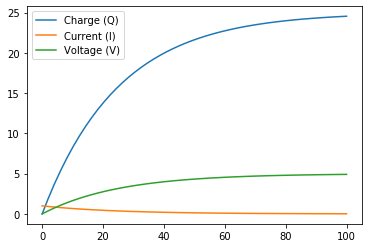

In [29]:
plt.plot(t, q, label='Charge (Q)')
plt.plot(t, i, label='Current (I)')
plt.plot(t, v, label='Voltage (V)')
plt.legend()

Second order equation solution
===

We solve the following differential equation

$$ \tau^2 \frac{d^2y}{dt^2} + 2 \zeta \tau \frac{dy}{dt} = -y + K_p x $$

To fit this into the SciPy model of

$$ \frac{d\boldsymbol{y}}{dt} = f(\boldsymbol{y}, t) $$

We rewrite the equation as a set of two equations instead

$$ v = \frac{dy}{dt} $$
$$ \tau^2 \frac{d^2y}{dt^2} = - 2 \zeta \tau v - y + K_p x $$

And set the vector $ \boldsymbol{y} $ in the above equation as $[ \frac {dy}{dt}, \frac{d^2y}{dt^2} ] $ and pass it to ODE Int

In [37]:
def dycap_dt(x, t):
    kp = 2.0
    tau = 3.0
    zeta = 0.05
    dx = 1.0

    y, dy_dt = x
    d2y_dt2 = (-2.0*zeta*tau*dy_dt - y + kp*dx)/tau**2

    return [dy_dt, d2y_dt2]

In [38]:
t = np.linspace(0, 500, 10000)
u = odeint(dycap_dt, [0,0], t)
y = u[:,0]

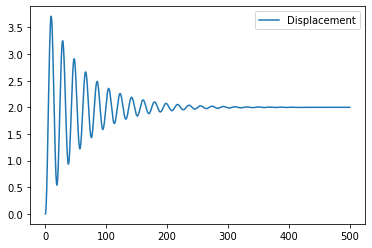

In [39]:
plt.plot(t, y, label="Displacement")
plt.legend()